In [32]:
import pandas as pd
import numpy as np
data_rfe=pd.read_csv('norm_shanxi.csv')
data_rfe=np.array(data_rfe)
fea=data_rfe[:,:49]
target=data_rfe[:,49]
x_test=fea[:170,:]
y_test=target[:170]
x_train=fea[170:,:]
y_train=target[170:]

# SVM-RFE_RELIEF

In [33]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,alpha,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            #print(relief_score)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            #print(rfe_score)
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            #print(total_score)
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
    def sele_feature(self,alpha,optim_featur_num):
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            if len(candi_fea)==optim_featur_num:
                return candi_fea

In [34]:
rfe_relief_model=rfe_relief_SVM(x_train,y_train,0.1)

In [35]:
aver_mean_lis1,F_measure_lis1=rfe_relief_model.featu_score(0.15,5)
print(aver_mean_lis1,F_measure_lis1)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8101127407484734, 0.807563025210084, 0.8080680098126207, 0.8060232788767682, 0.8085782138942534, 0.8060245837465422, 0.8055104650555875, 0.8065347878281747, 0.807556500861214, 0.8070423821702594, 0.8055130747951355, 0.8065256537397568, 0.8070358578213895, 0.8095894879691006, 0.8060141447883501, 0.8085651651965133, 0.807543452163474, 0.8085651651965133, 0.8065191293908868, 0.8065217391304348, 0.8080523513753327, 0.8054948066182994, 0.8065191293908868, 0.806008925309254, 0.8070319432120675, 0.8060076204394802, 0.8060115350488021, 0.80447961793413, 0.8060128399185762, 0.8049911268855368, 0.8034605146406388, 0.8034631243801869, 0.8034631243801869, 0.8060128399185761, 0.8065230440002088, 0.8070345529516153, 0.8055039407067174, 0.804482227673678, 0.8039720235920456, 0.8029516154287801, 0.8055039407067175, 0.8055039407067175, 0.8055039407067175, 0.8060141447883501, 0.8060115350488022] [0.7833897841648666, 0.791

In [36]:
aver_mean_lis2,F_measure_lis2=rfe_relief_model.featu_score(0.25,5)
print(aver_mean_lis2,F_measure_lis2)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8101127407484734, 0.807563025210084, 0.8080680098126207, 0.8060232788767682, 0.8085782138942534, 0.8060245837465422, 0.8055104650555875, 0.8065347878281747, 0.8044926666318701, 0.8050041755832767, 0.8050054804530508, 0.8039824625502374, 0.8044913617620961, 0.8070410773004854, 0.8121365937679419, 0.809075369278146, 0.8095842684900048, 0.809075369278146, 0.8080536562451067, 0.8049859074064407, 0.8060102301790282, 0.8065217391304348, 0.8080523513753327, 0.8039628895036275, 0.8070319432120675, 0.8060128399185761, 0.8049898220157627, 0.8060102301790281, 0.804989822015763, 0.8044783130643562, 0.80447961793413, 0.8019272926561929, 0.8019246829166449, 0.8009016650138318, 0.804482227673678, 0.8055026358369435, 0.8049924317553108, 0.8060141447883501, 0.8039720235920456, 0.8039720235920456, 0.8034605146406388, 0.8044822276736783, 0.8039720235920456, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0.791

In [37]:
aver_mean_lis3,F_measure_lis3=rfe_relief_model.featu_score(0.35,5)
print(aver_mean_lis3,F_measure_lis3)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8101127407484734, 0.807563025210084, 0.8080680098126207, 0.8060232788767682, 0.8055130747951355, 0.80602719348609, 0.8065373975677227, 0.8065308732188529, 0.8044926666318701, 0.8039811576804634, 0.8050054804530508, 0.8039824625502374, 0.8024427162169216, 0.8065243488699828, 0.8121365937679419, 0.8085625554569654, 0.8065204342606609, 0.8085638603267393, 0.8080536562451067, 0.8070332480818415, 0.8055026358369435, 0.8080601805939768, 0.8024361918680516, 0.8065217391304348, 0.8034552951615428, 0.8060128399185761, 0.8049898220157627, 0.8060102301790281, 0.804989822015763, 0.8044783130643562, 0.80447961793413, 0.8065230440002088, 0.8019246829166449, 0.8009016650138318, 0.804482227673678, 0.8055026358369435, 0.8049924317553108, 0.8060141447883501, 0.8039720235920456, 0.8039720235920456, 0.8034605146406388, 0.8044822276736783, 0.8039720235920456, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0.791

In [38]:
aver_mean_lis4,F_measure_lis4=rfe_relief_model.featu_score(0.45,5)
print(aver_mean_lis4,F_measure_lis4)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8101127407484734, 0.8080693146823947, 0.807563025210084, 0.8065360926979487, 0.8055130747951355, 0.80602719348609, 0.8055156845346835, 0.8065360926979487, 0.8090910277154342, 0.8070449919098074, 0.8050054804530508, 0.8039824625502374, 0.8024427162169216, 0.8055039407067175, 0.8024401064773736, 0.8024401064773736, 0.8049963463646328, 0.8090727595385981, 0.8080536562451067, 0.8070332480818415, 0.8070345529516153, 0.8034618195104128, 0.8055026358369435, 0.80600762043948, 0.8039668041129495, 0.8029450910799103, 0.8039668041129495, 0.8024348869982776, 0.8039668041129495, 0.8060128399185761, 0.807544757033248, 0.807543452163474, 0.8065230440002088, 0.8070345529516155, 0.8060115350488022, 0.8060102301790281, 0.8065217391304348, 0.8070332480818415, 0.804989822015763, 0.8019272926561929, 0.8029503105590063, 0.801931207265515, 0.8024374967378256, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0.79133

In [39]:
aver_mean_lis5,F_measure_lis5=rfe_relief_model.featu_score(0.55,5)
print(aver_mean_lis5,F_measure_lis5)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8070489065191294, 0.8080693146823947, 0.807563025210084, 0.8070502113889034, 0.8070476016493554, 0.8075538911216661, 0.8095999269272927, 0.8044913617620961, 0.8050015658437288, 0.8039824625502374, 0.8075551959914401, 0.8039824625502374, 0.8024427162169216, 0.8055039407067175, 0.8024401064773736, 0.8024401064773736, 0.8034631243801869, 0.8024414113471476, 0.8039746333315936, 0.8034631243801869, 0.8003979852810689, 0.8034631243801869, 0.8044887520225481, 0.8029529202985541, 0.8049976512344068, 0.8044874471527741, 0.8039759382013674, 0.8070384675609376, 0.8044835325434521, 0.8039720235920456, 0.8029516154287804, 0.8049924317553108, 0.8080536562451067, 0.807543452163474, 0.8065230440002088, 0.8055026358369435, 0.8055026358369435, 0.8060141447883501, 0.8049937366250848, 0.8055039407067175, 0.8024401064773736, 0.8014170885745602, 0.8044783130643562, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 

In [40]:
aver_mean_lis6,F_measure_lis6=rfe_relief_model.featu_score(0.65,5)
print(aver_mean_lis6,F_measure_lis6)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8070489065191294, 0.8090897228456602, 0.807556500861214, 0.8060232788767682, 0.8060206691372201, 0.8080680098126207, 0.8075591106007621, 0.8065347878281749, 0.8050015658437288, 0.8080614854637508, 0.8060193642674461, 0.8034644292499609, 0.8024427162169216, 0.798868677905945, 0.8024401064773736, 0.8024401064773736, 0.8034631243801869, 0.8029529202985541, 0.8024427162169216, 0.8019325121352889, 0.8014210031838823, 0.8024453259564697, 0.8019338170050629, 0.8009134088417976, 0.8055039407067175, 0.8034618195104128, 0.8034618195104128, 0.8055026358369435, 0.8039720235920456, 0.8034605146406391, 0.8003966804112949, 0.8034579049010908, 0.8080549611148807, 0.8085651651965133, 0.8070345529516153, 0.8070345529516153, 0.8055026358369435, 0.8055013309671695, 0.803459209770865, 0.8009068844929276, 0.801928597525967, 0.8034605146406388, 0.8024374967378256, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0.

In [41]:
aver_mean_lis7,F_measure_lis7=rfe_relief_model.featu_score(0.75,5)
print(aver_mean_lis7,F_measure_lis7)

[0.7733519494754424, 0.7830536562451067, 0.8014327470118481, 0.8070489065191294, 0.8070489065191294, 0.8090897228456602, 0.8085821285035755, 0.8111318440419646, 0.8106242496998799, 0.8085808236338015, 0.8065360926979487, 0.8106177253510098, 0.8090871131061119, 0.8080614854637508, 0.8060193642674461, 0.8101036066600553, 0.8085703846756094, 0.8049937366250848, 0.8024401064773736, 0.8024401064773736, 0.8014196983141083, 0.8029529202985541, 0.8034644292499609, 0.8024453259564697, 0.7998903909389843, 0.8009121039720236, 0.7998916958087582, 0.8003992901508429, 0.807546061903022, 0.8070345529516155, 0.8080549611148807, 0.8039746333315936, 0.8039733284618196, 0.8039720235920456, 0.8044822276736783, 0.8049963463646327, 0.8049924317553108, 0.8060128399185761, 0.8054987212276215, 0.8070345529516153, 0.8055026358369435, 0.8055013309671695, 0.803459209770865, 0.8009068844929276, 0.801928597525967, 0.8034605146406388, 0.8024374967378256, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0

In [42]:
aver_mean_lis8,F_measure_lis8=rfe_relief_model.featu_score(0.85,5)
print(aver_mean_lis8,F_measure_lis8)

[0.7733519494754424, 0.7830536562451067, 0.8009160185813456, 0.8034683438592829, 0.8024479356960175, 0.8065387024374967, 0.8060271934860902, 0.8096025366668407, 0.8106242496998799, 0.8090884179758859, 0.8075591106007621, 0.8106177253510098, 0.8090871131061119, 0.8019325121352889, 0.8019325121352889, 0.8019325121352889, 0.8024466308262437, 0.8014210031838822, 0.7983571689545383, 0.8009081893627016, 0.8019299023957409, 0.801927292656193, 0.8024374967378256, 0.8039681089827235, 0.8004005950206169, 0.7998903909389843, 0.8019312072655149, 0.8014210031838823, 0.8044809228039043, 0.8049937366250848, 0.8060154496581241, 0.8060154496581242, 0.8070371626911633, 0.8080588757242028, 0.8024401064773736, 0.8019259877864189, 0.8044809228039043, 0.8049937366250848, 0.8039694138524975, 0.8055000260973955, 0.8024401064773736, 0.8003953755415211, 0.8029516154287804, 0.8044848374132261, 0.8034644292499609, 0.8024374967378256, 0.8024374967378256, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666,

In [43]:
aver_mean_lis9,F_measure_lis9=rfe_relief_model.featu_score(0.95,5)
print(aver_mean_lis9,F_measure_lis9)

[0.7733519494754424, 0.7769194634375489, 0.7850996920507333, 0.8029607495171982, 0.7998943055483063, 0.801936426744611, 0.8055169894044575, 0.806024583746542, 0.8055156845346833, 0.806025888616316, 0.8096012317970667, 0.8075525862518921, 0.8085756041547054, 0.80755519599144, 0.8085769090244794, 0.8095973171877446, 0.8029503105590063, 0.7993814917271257, 0.7998916958087582, 0.7998930006785324, 0.8029542251683282, 0.8029542251683282, 0.8029529202985541, 0.8034605146406388, 0.8049963463646328, 0.8039772430711416, 0.8004032047601649, 0.8014210031838823, 0.8044809228039043, 0.8049937366250848, 0.8065243488699828, 0.8070371626911633, 0.8070371626911633, 0.8080588757242028, 0.8065256537397568, 0.8039733284618196, 0.8049937366250848, 0.8034579049010908, 0.8039733284618196, 0.8044783130643562, 0.8039707187222715, 0.8029503105590063, 0.8014183934443343, 0.8039746333315936, 0.8029529202985541, 0.8055065504462654, 0.8024374967378256, 0.8029463959496843, 0.8060115350488022] [0.7833897841648666, 0.7

In [96]:
np.max(aver_mean_lis1[:2]),np.max(aver_mean_lis2[:2]),np.max(aver_mean_lis3[:2]),np.max(aver_mean_lis4[:2]),np.max(aver_mean_lis5[:2])

(0.7830536562451067,
 0.7830536562451067,
 0.7830536562451067,
 0.7830536562451067,
 0.7830536562451067)

In [97]:
np.max(aver_mean_lis6[:2]),np.max(aver_mean_lis7[:2]),np.max(aver_mean_lis8[:2]),np.max(aver_mean_lis9[:2])

(0.7830536562451067,
 0.7830536562451067,
 0.7830536562451067,
 0.7769194634375489)

In [99]:
np.argmax(aver_mean_lis8[:2])

1

# SVM-RFE

In [44]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,x_train,y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,x_train,y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
   
    def featu_subset(self,featur_num):
        kf=KFold(n_splits=5,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            if len(candi_fea)==featur_num:
                break
        return candi_fea

In [45]:
rfe_SVM_model=rfe_SVM(x_train,y_train,0.1)
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis=rfe_SVM_model.featu_score(5)

In [46]:
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis

([0.7733519494754424,
  0.7830536562451067,
  0.8014327470118481,
  0.8070489065191294,
  0.8101127407484734,
  0.807563025210084,
  0.8080680098126207,
  0.8060232788767682,
  0.8085782138942534,
  0.8060245837465422,
  0.8055104650555875,
  0.8065347878281747,
  0.807556500861214,
  0.8070423821702594,
  0.8055130747951355,
  0.8065256537397568,
  0.8100983871809593,
  0.8080562659846547,
  0.8085664700662873,
  0.8075434521634742,
  0.8070332480818415,
  0.8085625554569654,
  0.8085651651965134,
  0.8065230440002088,
  0.8044757033248082,
  0.8039694138524975,
  0.809074064408372,
  0.8080588757242027,
  0.8090792838874681,
  0.8070306383422935,
  0.807543452163474,
  0.810605981523044,
  0.8080523513753327,
  0.8070319432120675,
  0.8080536562451067,
  0.8065243488699828,
  0.8055026358369435,
  0.8049911268855368,
  0.8065230440002088,
  0.8060128399185762,
  0.8065217391304348,
  0.8075434521634742,
  0.8085638603267394,
  0.8060141447883501,
  0.8065243488699828,
  0.80703455295

# SVM-RELIEF

In [47]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        featu_num=self.X_train.shape[1]
        relief_fea_score=reliefF.reliefF(self.X_train,self.Y_train)
        relief_candi_fea=list(reliefF.feature_ranking(relief_fea_score))
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        for i in range(featu_num):
            estimator=SVC(kernel='linear',C=self.C)
            candi_fea=relief_candi_fea[:(i+1)]
            aver=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i]=aver
            F_lis[i]=F1 
        return aver_lis,F_lis

In [48]:
relief_SVM_model=relief_SVM(x_train,y_train,0.1)
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis=relief_SVM_model.featu_score(5)

In [49]:
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis

([0.7733519494754424,
  0.7769194634375489,
  0.7850996920507333,
  0.7835664700662874,
  0.7932642622266297,
  0.7922425491935905,
  0.7932590427475338,
  0.7901965133879639,
  0.7881583068009812,
  0.7861148807349027,
  0.7845868782295528,
  0.7850944725716373,
  0.7845842684900047,
  0.7968356907980584,
  0.7978560989613237,
  0.797345894879691,
  0.797344590009917,
  0.7953037736833863,
  0.7963228769768778,
  0.7968343859282844,
  0.7932629573568557,
  0.8004018998903909,
  0.8009107991022496,
  0.8009107991022496,
  0.8009107991022496,
  0.8003992901508429,
  0.8014210031838823,
  0.7978469648729057,
  0.8019312072655149,
  0.8019312072655149,
  0.798869982775719,
  0.7973380656610469,
  0.8049937366250848,
  0.8049937366250848,
  0.8049950414948588,
  0.7993762722480297,
  0.8039746333315936,
  0.8039707187222715,
  0.7993775771178038,
  0.798869982775719,
  0.7993814917271257,
  0.8039707187222715,
  0.8070306383422935,
  0.8085612505871914,
  0.7998812568505664,
  0.8044822276

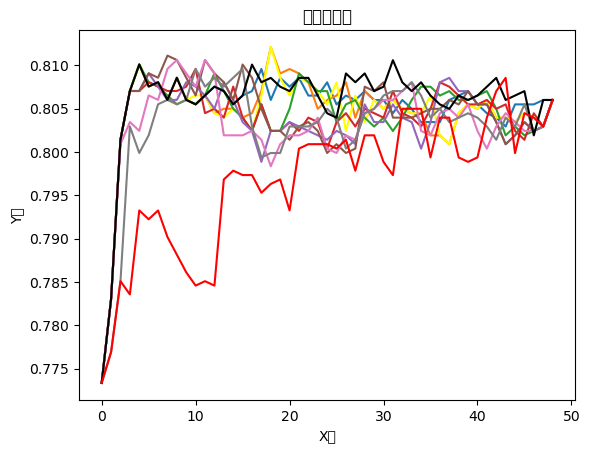

In [31]:
import matplotlib.pyplot as plt

fea_num=[i for i in range(49)]

# 创建图形
plt.plot(fea_num, aver_mean_lis1)
plt.plot(fea_num, aver_mean_lis2)
plt.plot(fea_num, aver_mean_lis3,color="yellow")
plt.plot(fea_num, aver_mean_lis4)
plt.plot(fea_num, aver_mean_lis5)
plt.plot(fea_num, aver_mean_lis6)
plt.plot(fea_num, aver_mean_lis7)
plt.plot(fea_num, aver_mean_lis8)
plt.plot(fea_num, aver_mean_lis9)
plt.plot(fea_num, rfe_SVM_aver_mean_lis,color="black")
plt.plot(fea_num, relief_SVM_aver_mean_lis,color="red")



# 添加标题和标签
plt.title('简单折线图')
plt.xlabel('X轴')
plt.ylabel('Y轴')

# 显示图形
plt.show()


In [50]:
shanxi_accuracy=[]
shanxi_accuracy.append(aver_mean_lis1)
shanxi_accuracy.append(aver_mean_lis2)
shanxi_accuracy.append(aver_mean_lis3)
shanxi_accuracy.append(aver_mean_lis4)
shanxi_accuracy.append(aver_mean_lis5)
shanxi_accuracy.append(aver_mean_lis6)
shanxi_accuracy.append(aver_mean_lis7)
shanxi_accuracy.append(aver_mean_lis8)
shanxi_accuracy.append(aver_mean_lis9)
shanxi_accuracy.append(rfe_SVM_aver_mean_lis)
shanxi_accuracy.append(relief_SVM_aver_mean_lis)

In [51]:
colu=[i for i in range(1,50)]
shanxi_acurracy_dataframe=pd.DataFrame(columns=colu,data=np.array(shanxi_accuracy))
shanxi_acurracy_dataframe.to_csv("shanxi_accuracy.csv")

In [52]:
shanxi_F_measure=[]
shanxi_F_measure.append(F_measure_lis1)
shanxi_F_measure.append(F_measure_lis2)
shanxi_F_measure.append(F_measure_lis3)
shanxi_F_measure.append(F_measure_lis4)
shanxi_F_measure.append(F_measure_lis5)
shanxi_F_measure.append(F_measure_lis6)
shanxi_F_measure.append(F_measure_lis7)
shanxi_F_measure.append(F_measure_lis8)
shanxi_F_measure.append(F_measure_lis9)
shanxi_F_measure.append(rfe_SVM_F_measure_lis)
shanxi_F_measure.append(relief_SVM_F_measure_lis)

In [53]:
colu=[i for i in range(1,50)]
shanxi_F_measure_dataframe=pd.DataFrame(columns=colu,data=np.array(shanxi_F_measure))
shanxi_F_measure_dataframe.to_csv("shanxi_F_measure.csv")